In [11]:
import keras 
from keras.callbacks import CSVLogger
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar100


In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [4]:
print('tensor shape')
print('\ttraining images:', train_images.shape)
print('\ttraining labels:', train_labels.shape)
print('\ttraining images:', train_images.dtype)
print('\ttraining labels:', train_labels.dtype)
print('\ttest images:', test_images.shape)
print('\ttest labels:', test_labels.shape)

tensor shape
	training images: (50000, 32, 32, 3)
	training labels: (50000, 1)
	training images: uint8
	training labels: int64
	test images: (10000, 32, 32, 3)
	test labels: (10000, 1)


In [5]:
train_images = train_images.reshape((50000, 32, 32, 3))
# train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 32, 32, 3))
# test_images = test_images.astype("float32") / 255

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


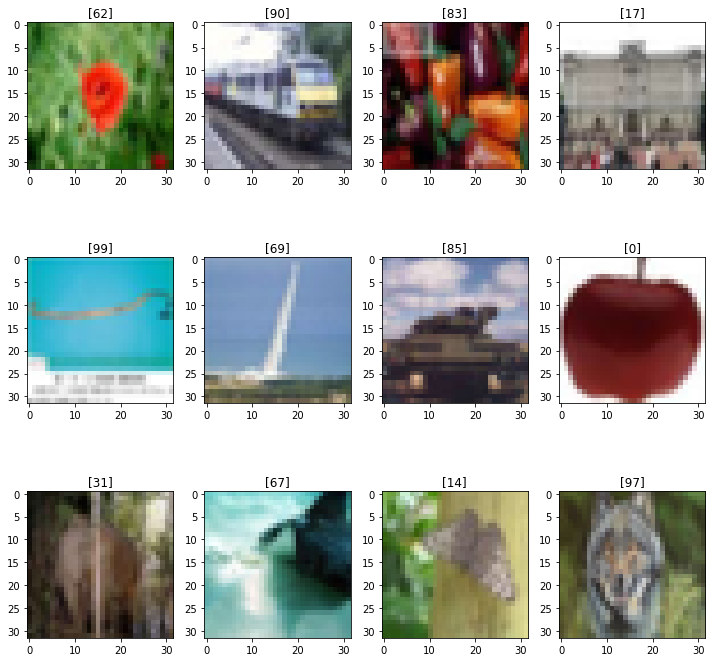

In [15]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
show_samples(train_images, train_labels)

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x),
x = layers.BatchNormalization(trainable=True)(x),
# x = layers.Dense(256, activation='relu')(x),
# x = layers.Dropout(0.3)(x),
# x = layers.BatchNormalization()(x),
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])
  
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [8]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 17s 20ms/step - loss: 3.9523 - accuracy: 0.1073
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 3.1444 - accuracy: 0.2335
Epoch 3/10
391/391 [==============================] - 8s 20ms/step - loss: 2.6293 - accuracy: 0.3313
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 2.2294 - accuracy: 0.4155
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 1.8748 - accuracy: 0.4957
Epoch 6/10
391/391 [==============================] - 10s 27ms/step - loss: 1.4852 - accuracy: 0.5862
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 1.1018 - accuracy: 0.6857
Epoch 8/10
391/391 [==============================] - 8s 20ms/step - loss: 0.7558 - accuracy: 0.7817
Epoch 9/10
391/391 [==============================] - 8s 20ms/step - loss: 0.5181 - accuracy: 0.8472
Epoch 10/10
391/391 [==============================] - 8s 20ms/step - loss: 0.3531 - accu

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 4ms/step - loss: 3.4625 - accuracy: 0.3653
Test accuracy: 0.365


In [10]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


In [17]:
history.history

{'loss': [3.952275514602661,
  3.1444296836853027,
  2.6293113231658936,
  2.2293522357940674,
  1.8747625350952148,
  1.4852343797683716,
  1.1018006801605225,
  0.7558155655860901,
  0.5181118845939636,
  0.3530615270137787],
 'accuracy': [0.10726000368595123,
  0.23353999853134155,
  0.331279993057251,
  0.4154999852180481,
  0.4956600069999695,
  0.5862399935722351,
  0.6857200264930725,
  0.7817400097846985,
  0.8471599817276001,
  0.894599974155426]}

In [16]:
plot_train_val_acc(history)
print('Base Model Validation Accuracy: ', round(history.history['val_accuracy'][-1]*100,5),'%')

KeyError: ignored

<Figure size 432x288 with 0 Axes>